In [1]:
%matplotlib inline

In [78]:
# Import dependencies
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import statistics
import scipy.stats as sts
import pandas as pd

# Set things up so the plots show up correctly in my dark Jupyter Notebook theme
# Source: https://fredriccliver.medium.com/cant-not-see-axis-label-of-jupyter-notebook-in-the-dark-theme-vscode-df31a3ee121
from matplotlib import style
style.use('dark_background')

In [3]:
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [4]:
# Read the city data file and store it in a datafram
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [5]:
# Read the ride data file and store it in a dataframe
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [6]:
# Get the columns and rows that are not null
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [7]:
# Make sure there are no null values
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [8]:
# Get the data types of each column
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [9]:
# Get the unique values of the type of city
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [10]:
# Get the number of data points for the urban cities
sum(city_data_df['type'] == "Urban")

66

In [11]:
sum(city_data_df['type'] == "Suburban")

36

In [12]:
sum(city_data_df['type'] == "Rural")

18

In [13]:
# Get the columns and rows that are not null in ride data
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [14]:
# Make sure there are no null values
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [15]:
# Check data types
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [16]:
# Combine the data into a single data set
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [17]:
# Create dataframe for each city type
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]

urban_cities_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
1620,Reynoldsfurt,2019-02-14 11:25:10,39.40,9070692324754,67,Urban
1621,Christopherfurt,2019-03-13 01:47:52,32.05,2788817929605,41,Urban
1622,Raymondhaven,2019-03-20 02:20:34,38.53,8658255136559,11,Urban
1623,Port Johnbury,2019-03-26 07:22:45,7.63,8089282605778,3,Urban


In [18]:
# Get the ride counts for each city by type, creating a series for each
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]

In [19]:
# Get the average fare for each city by type
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]

In [20]:
# Get the driver count for each city by type. The average is meaningless since the 
# driver count for each city is constant, but using mean method works fine to get
# that constant value.
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]

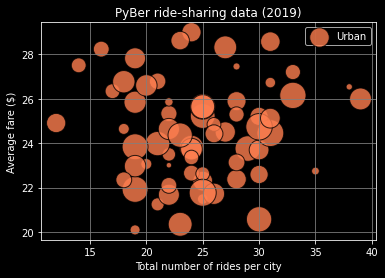

In [21]:
# Create scatter plot for urban cities
plt.scatter(
    urban_ride_count, 
    urban_avg_fare,
    s=10*urban_driver_count, color="coral",
    edgecolor="black", linewidths=1,
    alpha=0.8, label="Urban"
)

plt.title("PyBer ride-sharing data (2019)")
plt.ylabel("Average fare ($)")
plt.xlabel("Total number of rides per city")
plt.grid(True, color="gray")
plt.legend()

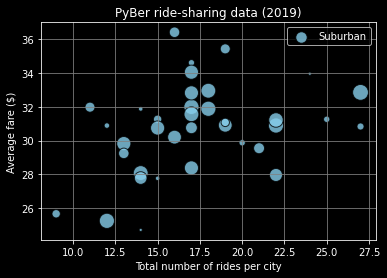

In [22]:
# Create scatter plot for suburban cities
plt.scatter(
    suburban_ride_count, 
    suburban_avg_fare,
    s=10*suburban_driver_count, color="skyblue",
    edgecolor="black", linewidths=1,
    alpha=0.8, label="Suburban"
)

plt.title("PyBer ride-sharing data (2019)")
plt.ylabel("Average fare ($)")
plt.xlabel("Total number of rides per city")
plt.grid(True, color="gray")
plt.legend()

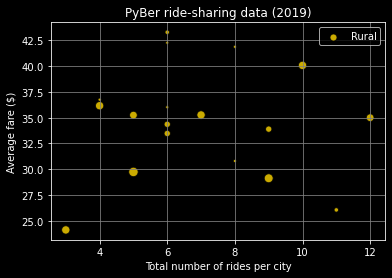

In [23]:
# Create scatter plot for rural cities
plt.scatter(
    rural_ride_count, 
    rural_avg_fare, 
    s=10*rural_driver_count, c="gold", 
    edgecolor="black", linewidths=1, 
    alpha=0.8, label="Rural"
)

plt.title("PyBer ride-sharing data (2019)")
plt.ylabel("Average fare ($)")
plt.xlabel("Total number of rides per city")
plt.grid(True, color="gray")
plt.legend()

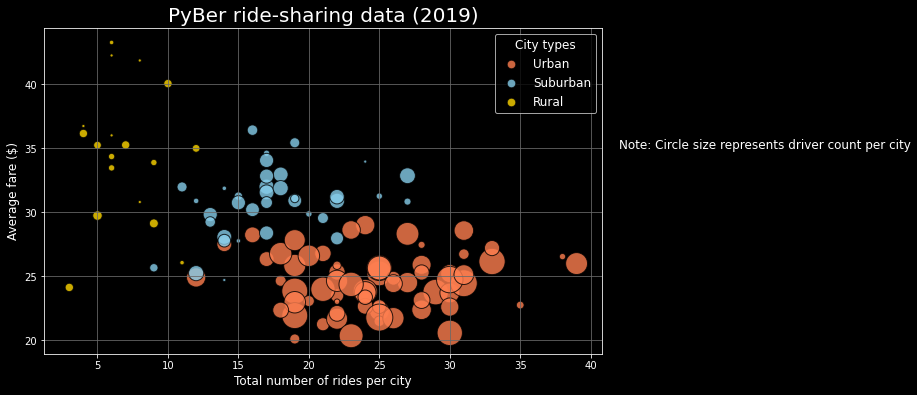

In [24]:
# Add the scatter charts for each type of city
plt.subplots(figsize=(10, 6))

plt.scatter(
    urban_ride_count, 
    urban_avg_fare,
    s=10*urban_driver_count, color="coral",
    edgecolor="black", linewidths=1,
    alpha=0.8, label="Urban"
)

plt.scatter(
    suburban_ride_count, 
    suburban_avg_fare,
    s=10*suburban_driver_count, color="skyblue",
    edgecolor="black", linewidths=1,
    alpha=0.8, label="Suburban"
)

plt.scatter(
    rural_ride_count, 
    rural_avg_fare, 
    s=10*rural_driver_count, c="gold", 
    edgecolor="black", linewidths=1, 
    alpha=0.8, label="Rural"
)

# Incorporate the other chart properties
plt.title("PyBer ride-sharing data (2019)", fontsize=20)
plt.ylabel("Average fare ($)", fontsize=12)
plt.xlabel("Total number of rides per city", fontsize=12)
plt.grid(True, color="dimgray")

# Add the legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
                 scatterpoints=1, loc="best", title="City types")

lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]

lgnd.get_title().set_fontsize(12)

# Add a note off to the side
plt.text(42, 35, "Note: Circle size represents driver count per city", fontsize = "12")

# Save and show the plot

plt.savefig("analysis/Fig1.png")
plt.show()


In [25]:
# Get summary statistics
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [26]:
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [27]:
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [28]:
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [29]:
# Calculate the mean of the ride count for each city type
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [30]:
round(urban_ride_count.median(),2), round(suburban_ride_count.median(),2), round(rural_ride_count.median(),2)

(24.0, 17.0, 6.0)

In [31]:
# Calculate the mode of the ride count for urban cities
urban_ride_count.mode()

0    22
1    25
dtype: int64

In [32]:
suburban_ride_count.mode()

0    17
dtype: int64

In [33]:
# Calculate the measures of central tendency for the ride counts for urban cities

mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).


In [34]:
# Calculate the measures of central tendency for the ride counts for suburban cities

mean_suburban_ride_count = np.mean(suburban_ride_count)
print(f"The mean for the ride counts for suburban trips is {mean_suburban_ride_count:.2f}.")

median_suburban_ride_count = np.median(suburban_ride_count)
print(f"The median for the ride counts for suburban trips is {median_suburban_ride_count}.")

mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mode for the ride counts for suburban trips is {mode_suburban_ride_count}.")

The mean for the ride counts for suburban trips is 17.36.
The median for the ride counts for suburban trips is 17.0.
The mode for the ride counts for suburban trips is ModeResult(mode=array([17], dtype=int64), count=array([7])).


In [35]:
# Calculate the measures of central tendency for the ride counts for rural cities

mean_rural_ride_count = np.mean(rural_ride_count)
print(f"The mean for the ride counts for rural trips is {mean_rural_ride_count:.2f}.")

median_rural_ride_count = np.median(rural_ride_count)
print(f"The median for the ride counts for rural trips is {median_rural_ride_count}.")

mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride counts for rural trips is {mode_rural_ride_count}.")

The mean for the ride counts for rural trips is 6.94.
The median for the ride counts for rural trips is 6.0.
The mode for the ride counts for rural trips is ModeResult(mode=array([6], dtype=int64), count=array([5])).


In [36]:
# Get the fares for the urban cities
urban_fares = urban_cities_df["fare"]
suburban_fares = suburban_cities_df["fare"]
rural_fares = rural_cities_df["fare"]


In [37]:
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare for urban trips is ${mode_urban_fares}.")

The mean fare for urban trips is $24.53.
The median fare for urban trips is $24.64.
The mode fare for urban trips is $ModeResult(mode=array([22.86]), count=array([5])).


In [38]:
# Calculate the measures of central tendency for the average fare for the suburban cities.
mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare for suburban trips is ${mean_suburban_fares:.2f}.")

median_suburban_fares = np.median(suburban_fares)
print(f"The median fare for suburban trips is ${median_suburban_fares:.2f}.")

mode_suburban_fares = sts.mode(suburban_fares)
print(f"The mode fare for suburban trips is ${mode_suburban_fares}.")

The mean fare for suburban trips is $30.97.
The median fare for suburban trips is $30.75.
The mode fare for suburban trips is $ModeResult(mode=array([17.99]), count=array([3])).


In [39]:
# Calculate the measures of central tendency for the average fare for the rural cities.
mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare for rural trips is ${mean_rural_fares:.2f}.")

median_rural_fares = np.median(rural_fares)
print(f"The median fare for rural trips is ${median_rural_fares:.2f}.")

mode_rural_fares = sts.mode(rural_fares)
print(f"The mode fare for rural trips is ${mode_rural_fares}.")

The mean fare for rural trips is $34.62.
The median fare for rural trips is $37.05.
The mode fare for rural trips is $ModeResult(mode=array([37.05]), count=array([2])).


In [40]:
# Get the driver counts for the various city types
urban_drivers = urban_cities_df['driver_count']
suburban_drivers = suburban_cities_df['driver_count']
rural_drivers = rural_cities_df['driver_count']

In [41]:
# Calculate the measures of central tendency for the driver counts by city type

mean_urban_drivers = np.mean(urban_drivers)
print(f"The mean driver count for urban cities is {mean_urban_drivers:.0f}.")
median_urban_drivers = np.median(urban_drivers)
print(f"The median driver count for urban cities is {median_urban_drivers:.0f}.")
mode_urban_drivers = sts.mode(urban_drivers)
print(f"The mode driver count for urban cities is {mode_urban_drivers}.\n")

mean_suburban_drivers = np.mean(suburban_drivers)
print(f"The mean driver count for suburban cities is {mean_suburban_drivers:.0f}.")
median_suburban_drivers = np.median(suburban_drivers)
print(f"The median driver count for suburban cities is {median_suburban_drivers:.0f}.")
mode_suburban_drivers = sts.mode(suburban_drivers)
print(f"The mode driver count for suburban cities is {mode_suburban_drivers}.\n")

mean_rural_drivers = np.mean(rural_drivers)
print(f"The mean driver count for rural cities is {mean_rural_drivers:.0f}.")
median_rural_drivers = np.median(rural_drivers)
print(f"The median driver count for rural cities is {median_rural_drivers:.0f}.")
mode_rural_drivers = sts.mode(rural_drivers)
print(f"The mode driver count for rural cities is {mode_rural_drivers}.")


The mean driver count for urban cities is 37.
The median driver count for urban cities is 37.
The mode driver count for urban cities is ModeResult(mode=array([39], dtype=int64), count=array([86])).

The mean driver count for suburban cities is 14.
The median driver count for suburban cities is 16.
The mode driver count for suburban cities is ModeResult(mode=array([20], dtype=int64), count=array([79])).

The mean driver count for rural cities is 4.
The median driver count for rural cities is 4.
The mode driver count for rural cities is ModeResult(mode=array([1], dtype=int64), count=array([32])).


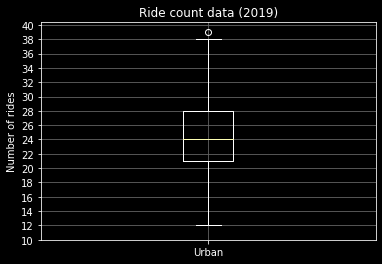

In [42]:
# Create a box-and-whisker plot for the urban cities ride counts
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)

# Add the title, y-axis label and grid
ax.set_title("Ride count data (2019)")
ax.set_ylabel("Number of rides")
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid(color="dimgray")
plt.show()


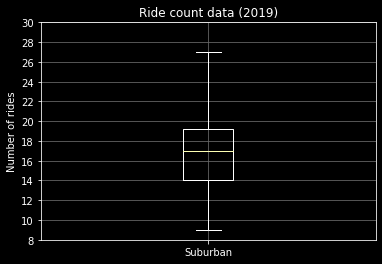

In [43]:
# Create a box-and-whisker plot for the suburban cities ride counts
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_ride_count, labels=x_labels)

# Add the title, y-axis label and grid
ax.set_title("Ride count data (2019)")
ax.set_ylabel("Number of rides")
ax.set_yticks(np.arange(8, 31, step=2.0))
ax.grid(color="dimgray")
plt.show()

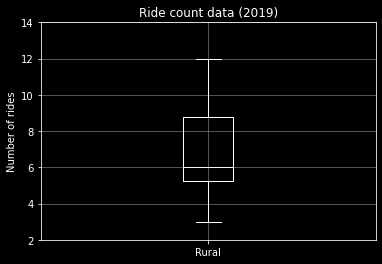

In [44]:
# Create a box-and-whisker plot for the rural cities ride counts
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_ride_count, labels=x_labels)

# Add the title, y-axis label and grid
ax.set_title("Ride count data (2019)")
ax.set_ylabel("Number of rides")
ax.set_yticks(np.arange(2, 15, step=2.0))
ax.grid(color="dimgray")
plt.show()

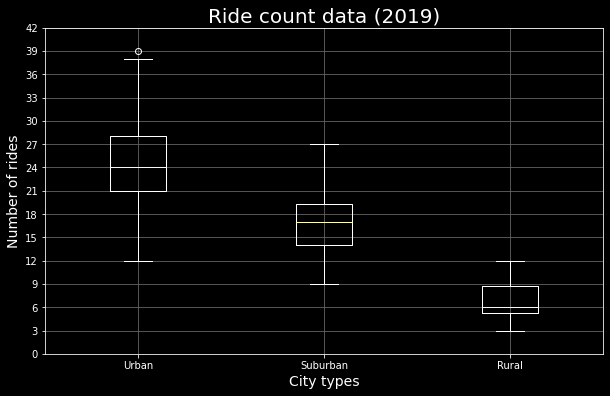

In [45]:
# Add all ride count box-and-whisker plots to the same graph
x_labels = ["Urban", "Suburban", "Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride count data (2019)',fontsize=20)
ax.set_ylabel("Number of rides", fontsize=14)
ax.set_xlabel("City types", fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid(color="dimgray")

# Save the figure
plt.savefig("analysis/Fig2.png")
plt.show()

In [46]:
# Get the ride count outlier for urban cities

urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")


West Angela has the highest rider count.


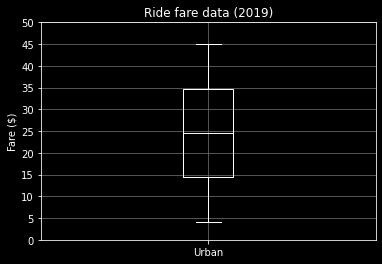

Summary statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [47]:
# Create a box-and-whisker plot for the urban fare data
x_labels = ["Urban"]
fix, ax = plt.subplots()
ax.boxplot(urban_fares, labels=x_labels)

ax.set_title("Ride fare data (2019)")
ax.set_ylabel("Fare ($)")
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid(color="dimgray")

plt.show()
print ("Summary statistics")
urban_fares.describe()

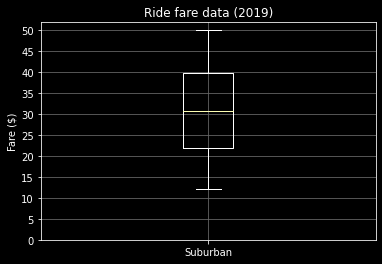

Summary statistics


count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: fare, dtype: float64

In [48]:
# Create a box-and-whisker plot for the suburban fare data
x_labels = ["Suburban"]
fix, ax = plt.subplots()
ax.boxplot(suburban_fares, labels=x_labels)

ax.set_title("Ride fare data (2019)")
ax.set_ylabel("Fare ($)")
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid(color="dimgray")

plt.show()
print ("Summary statistics")
suburban_fares.describe()

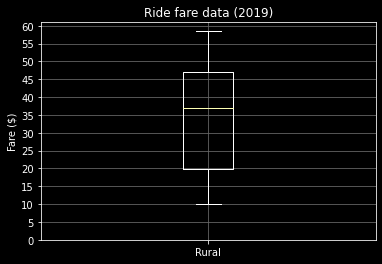

Summary statistics


count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64

In [49]:
# Create a box-and-whisker plot for the rural fare data
x_labels = ["Rural"]
fix, ax = plt.subplots()
ax.boxplot(rural_fares, labels=x_labels)

ax.set_title("Ride fare data (2019)")
ax.set_ylabel("Fare ($)")
ax.set_yticks(np.arange(0, 61, step=5.0))
ax.grid(color="dimgray")

plt.show()
print ("Summary statistics")
rural_fares.describe()

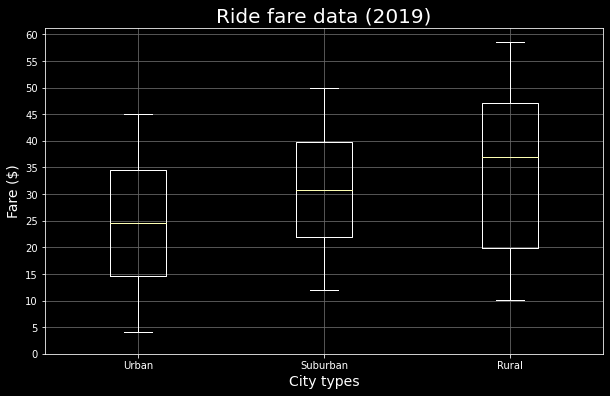

In [50]:
# Add all ride fare box-and-whisker plots to the same graph
x_labels = ["Urban", "Suburban", "Rural"]
ride_fare_data = [urban_fares, suburban_fares, rural_fares]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride fare data (2019)',fontsize=20)
ax.set_ylabel("Fare ($)", fontsize=14)
ax.set_xlabel("City types", fontsize=14)
ax.boxplot(ride_fare_data, labels=x_labels)
ax.set_yticks(np.arange(0, 61, step=5.0))
ax.grid(color="dimgray")

# Save the figure
plt.savefig("analysis/Fig3.png")
plt.show()

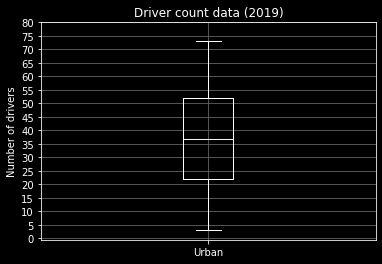

Summary statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [51]:
# Create the box-and-whisker plot for the urban driver count data
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_drivers, labels=x_labels)

ax.set_title("Driver count data (2019)")
ax.set_ylabel("Number of drivers")
ax.set_yticks(np.arange(0, 81, step=5.0))
ax.grid(color="dimgray")

plt.show()

print("Summary statistics")
urban_drivers.describe()

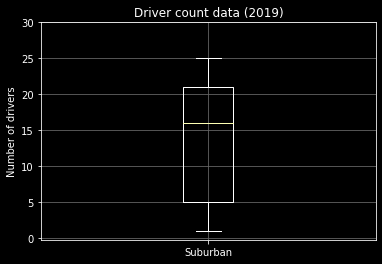

Summary statistics


count    625.000000
mean      13.712000
std        8.042372
min        1.000000
25%        5.000000
50%       16.000000
75%       21.000000
max       25.000000
Name: driver_count, dtype: float64

In [52]:
# Create the box-and-whisker plot for the suburban driver count data
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_drivers, labels=x_labels)

ax.set_title("Driver count data (2019)")
ax.set_ylabel("Number of drivers")
ax.set_yticks(np.arange(0, 31, step=5.0))
ax.grid(color="dimgray")

plt.show()

print("Summary statistics")
suburban_drivers.describe()

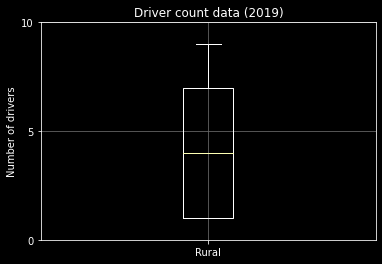

Summary statistics


count    125.000000
mean       4.296000
std        2.691156
min        1.000000
25%        1.000000
50%        4.000000
75%        7.000000
max        9.000000
Name: driver_count, dtype: float64

In [58]:
# Create the box-and-whisker plot for the rural driver count data
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_drivers, labels=x_labels)

ax.set_title("Driver count data (2019)")
ax.set_ylabel("Number of drivers")
ax.set_yticks(np.arange(0, 11, step=5.0))
ax.grid(color="dimgray")

plt.show()

print("Summary statistics")
rural_drivers.describe()

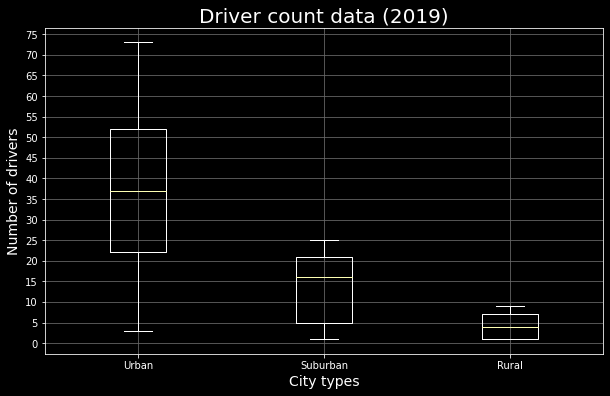

In [54]:
# Add all driver box-and-whisker plots to the same graph
x_labels = ["Urban", "Suburban", "Rural"]
driver_count_data = [urban_drivers, suburban_drivers, rural_drivers]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Driver count data (2019)',fontsize=20)
ax.set_ylabel("Number of drivers", fontsize=14)
ax.set_xlabel("City types", fontsize=14)
ax.boxplot(driver_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 76, step=5.0))
ax.grid(color="dimgray")

# Save the figure
plt.savefig("analysis/Fig4.png")
plt.show()

In [61]:
# Get the sums of fares by type of city
sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [63]:
# Get the sum of all fares
total_fares = pyber_data_df["fare"].sum()
total_fares

63538.64

In [64]:
# Calculate the percentage of fares for each city type
type_percents = 100 * sum_fares_by_type / total_fares
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

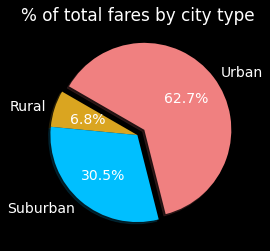

In [82]:
# Create the pie chart
plt.pie(type_percents, 
        labels=["Rural", "Suburban", "Urban"],
        colors=["goldenrod", "deepskyblue", "lightcoral"],
        explode=[0, 0, 0.1],
        autopct="%1.1f%%",
        shadow=True, startangle=150)

plt.title("% of total fares by city type")
mpl.rcParams['font.size'] = 14

plt.savefig("analysis/Fig5.png")

plt.show()

In [83]:
# Calculate the percentage of rides for each city type
ride_percents = 100 * pyber_data_df.groupby(
    "type").count()["ride_id"] / pyber_data_df["ride_id"].count()
ride_percents

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

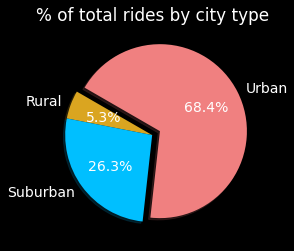

In [84]:
plt.pie(ride_percents, 
        labels=["Rural", "Suburban", "Urban"],
        colors=["goldenrod", "deepskyblue", "lightcoral"],
        explode=[0, 0, 0.1],
        autopct="%1.1f%%",
        shadow=True, startangle=150)

plt.title("% of total rides by city type")
mpl.rcParams['font.size'] = 14

plt.savefig("analysis/Fig6.png")

plt.show()